# 资源

- [Scipy Lecture Notes](www.scipy-lectures.org), 2015 Edition.

# 导入

In [1]:
import numpy as np

# array对象

## 创建数组

In [2]:
# 1-D
a = np.array([0,1,2,3])
a

array([0, 1, 2, 3])

In [3]:
a.ndim, a.shape, len(a)

(1, (4,), 4)

In [4]:
# 2-D, 3-D, ...
b = np.array([[0,1,2], [3,4,5]]) # 2 X 3
b

array([[0, 1, 2],
       [3, 4, 5]])

In [5]:
b.ndim, b.shape, len(b)

(2, (2, 3), 2)

In [6]:
c = np.array([ [[1], [2]], [[3], [4]] ]) # 2 X 2 X 1
c

array([[[1],
        [2]],

       [[3],
        [4]]])

In [7]:
c.shape

(2, 2, 1)

### 创建数组的函数

- arange
- linspace
- ones
- zeros
- eye
- diag
- random

In [8]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
b = np.arange(1, 9, 2) # 指定步长
b

array([1, 3, 5, 7])

In [10]:
c = np.linspace(0, 1, 6)
c

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [11]:
d = np.linspace(0, 1, 5, endpoint=False)
d

array([0. , 0.2, 0.4, 0.6, 0.8])

In [12]:
np.ones((3, 3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [13]:
np.zeros((2, 2))

array([[0., 0.],
       [0., 0.]])

In [14]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [15]:
np.diag(np.array([1,2,3,4]))

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [16]:
np.random.rand(4) # [0,1]均匀分布

array([0.10589272, 0.06939767, 0.38408361, 0.52006945])

In [17]:
np.random.randn(4) # 高斯分布

array([-0.70311862, -0.4446049 , -1.99079911,  0.43487583])

In [18]:
np.random.seed(1234) # 指定随机数种子
np.random.rand(4)

array([0.19151945, 0.62210877, 0.43772774, 0.78535858])

In [19]:
np.random.seed(1234)
np.random.rand(4)

array([0.19151945, 0.62210877, 0.43772774, 0.78535858])

### maskedarray

In [20]:
x = np.ma.array([1,2,3,4], mask=[0,1,0,1])
x

masked_array(data=[1, --, 3, --],
             mask=[False,  True, False,  True],
       fill_value=999999)

In [21]:
x + 1

masked_array(data=[2, --, 4, --],
             mask=[False,  True, False,  True],
       fill_value=999999)

In [22]:
x[1]

masked

In [23]:
np.ma.sqrt([1,-1,2,-2])

masked_array(data=[1.0, --, 1.4142135623730951, --],
             mask=[False,  True, False,  True],
       fill_value=1e+20)

## 数据类型

In [24]:
a = np.array([1,2,3])
a.dtype

dtype('int64')

In [25]:
b = np.array([1., 2., 3.])
b.dtype

dtype('float64')

In [26]:
c = np.array([1,2,3], dtype=float) # int32, int64, uint32, uint64
c.dtype

dtype('float64')

In [27]:
np.array([1+2j, 3+4j, 5+6j]).dtype

dtype('complex128')

In [28]:
np.array([True, False, False, True]).dtype

dtype('bool')

In [29]:
np.array(['Bonjour', 'Hello', '你好']).dtype

dtype('<U7')

In [30]:
## 转型
np.array([1,2,3]) + 1.5

array([2.5, 3.5, 4.5])

In [31]:
a = np.array([1.7, 1.2, 1.6])
b = a.astype(int) # 截断为整数
b

array([1, 1, 1])

In [32]:
## 不同数据类型的大小
# int8, int16, int32, int64
# uint8, uint16, uint32, uint64
np.iinfo(np.int32).max, np.iinfo(np.uint32).max

(2147483647, 4294967295)

In [33]:
# float16, float32, float64, float96, float128
np.finfo(np.float32).eps, np.finfo(np.float64).eps

(1.1920929e-07, 2.220446049250313e-16)

In [34]:
# complex64, complex128, complex192, complex256
np.array([0, 1], dtype=complex)

array([0.+0.j, 1.+0.j])

### 结构数据类型

In [35]:
samples = np.zeros((6,), dtype=[('sensor_code', 'U4'), 
                               ('position', float),
                               ('value', float)])
samples

array([('', 0., 0.), ('', 0., 0.), ('', 0., 0.), ('', 0., 0.),
       ('', 0., 0.), ('', 0., 0.)],
      dtype=[('sensor_code', '<U4'), ('position', '<f8'), ('value', '<f8')])

In [36]:
samples.ndim, samples.shape, samples.dtype.names

(1, (6,), ('sensor_code', 'position', 'value'))

In [37]:
samples[:] = [('ALFA', 1, 0.37),
             ('BETA', 1, 0.11),
             ('TAU', 1, 0.13),
             ('ALFA', 1.5, 0.37),
             ('ALFA', 3, 0.11),
             ('TAU', 1.2, 0.13)]
samples

array([('ALFA', 1. , 0.37), ('BETA', 1. , 0.11), ('TAU', 1. , 0.13),
       ('ALFA', 1.5, 0.37), ('ALFA', 3. , 0.11), ('TAU', 1.2, 0.13)],
      dtype=[('sensor_code', '<U4'), ('position', '<f8'), ('value', '<f8')])

In [38]:
samples['sensor_code']

array(['ALFA', 'BETA', 'TAU', 'ALFA', 'ALFA', 'TAU'], dtype='<U4')

In [39]:
samples['value']

array([0.37, 0.11, 0.13, 0.37, 0.11, 0.13])

In [40]:
samples[0]

('ALFA', 1., 0.37)

In [41]:
samples[0]['sensor_code'] = 'TAU'
samples[0]

('TAU', 1., 0.37)

In [42]:
samples[['position', 'value']]

array([(1. , 0.37), (1. , 0.11), (1. , 0.13), (1.5, 0.37), (3. , 0.11),
       (1.2, 0.13)],
      dtype={'names':['position','value'], 'formats':['<f8','<f8'], 'offsets':[16,24], 'itemsize':32})

In [43]:
samples[samples['sensor_code'] == 'ALFA']

array([('ALFA', 1.5, 0.37), ('ALFA', 3. , 0.11)],
      dtype=[('sensor_code', '<U4'), ('position', '<f8'), ('value', '<f8')])

## 可视化

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

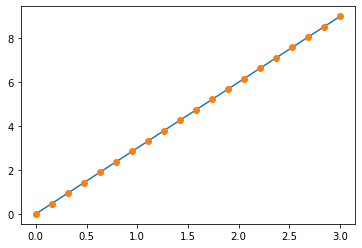

In [45]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)
plt.plot(x, y, 'o')

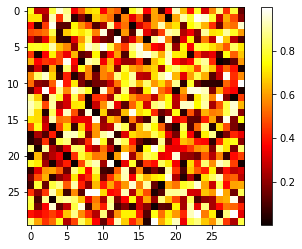

In [46]:
image = np.random.rand(30, 30)
plt.imshow(image, cmap=plt.cm.hot)
plt.colorbar()

## 索引和切片

In [47]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [48]:
a[0], a[2], a[-1]

(0, 2, 9)

In [49]:
# 带步长
a[::2], a[::-1]

(array([0, 2, 4, 6, 8]), array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0]))

In [50]:
a[2:9:3] # [start:end:step]

array([2, 5, 8])

In [51]:
a[1:3], a[::2], a[3:]

(array([1, 2]), array([0, 2, 4, 6, 8]), array([3, 4, 5, 6, 7, 8, 9]))

In [52]:
a = np.diag(np.arange(3))
a

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 2]])

In [53]:
a[1,1]

1

In [54]:
a[2,1] = 10 # 赋值
a

array([[ 0,  0,  0],
       [ 0,  1,  0],
       [ 0, 10,  2]])

In [55]:
a[1]

array([0, 1, 0])

In [56]:
a = np.arange(56).reshape(7, 8)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55]])

In [57]:
a[0, 3:5]

array([3, 4])

In [58]:
a[4:, 4:]

array([[36, 37, 38, 39],
       [44, 45, 46, 47],
       [52, 53, 54, 55]])

In [59]:
a[:, 2]

array([ 2, 10, 18, 26, 34, 42, 50])

### 使用布尔掩码索引

In [60]:
np.random.seed(3)
a = np.random.randint(0, 21, 15)
a

array([10,  3,  8,  0, 19, 10, 11,  9, 10,  6,  0, 20, 12,  7, 14])

In [61]:
mask = a % 3 == 0
a[mask]

array([ 3,  0,  9,  6,  0, 12])

In [62]:
a[a % 3 == 0] = -1 # 赋值
a

array([10, -1,  8, -1, 19, 10, 11, -1, 10, -1, -1, 20, -1,  7, 14])

### 使用整数数组索引

In [63]:
a = np.arange(0, 100, 10)
a

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [64]:
a[[2,3,2,4,2]] # Python列表

array([20, 30, 20, 40, 20])

In [65]:
a[[9, 7]] = -100 # 赋值
a

array([   0,   10,   20,   30,   40,   50,   60, -100,   80, -100])

In [66]:
a = np.arange(10)
idx = np.array([[3, 4], [9, 2]])
a, idx, a.shape, idx.shape

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([[3, 4],
        [9, 2]]),
 (10,),
 (2, 2))

In [67]:
a[idx] # 按索引数组形状

array([[3, 4],
       [9, 2]])

## 拷贝和视图

- 切片操作创建原始数组的实体

In [68]:
a = np.arange(10)
b = a[::2] # 视图
np.may_share_memory(a, b) # 是否共享内存

True

In [69]:
b[0] = 12 # 元素都改变
np.may_share_memory(a, b), a, b

(True,
 array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9]),
 array([12,  2,  4,  6,  8]))

In [70]:
a = np.arange(10)
c = a[::2].copy() # 拷贝
c[0] = 12 # 只修改拷贝
np.may_share_memory(a, c), a, c

(False, array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([12,  2,  4,  6,  8]))

# array上数值操作

## 元素级操作

In [71]:
# 标量
a = np.array([1,2,3,4])

a, a + 1, 2 ** a

(array([1, 2, 3, 4]), array([2, 3, 4, 5]), array([ 2,  4,  8, 16]))

In [72]:
# 算术
a = np.array([1,2,3,4])
b = np.ones(4) + 1

a - b, a * b

(array([-1.,  0.,  1.,  2.]), array([2., 4., 6., 8.]))

In [73]:
j = np.arange(5)
2 ** (j+1) - j

array([ 2,  3,  6, 13, 28])

In [74]:
# 比较
a = np.array([1,2,3,4])
b = np.array([4,2,2,4])

a == b, a > b

(array([False,  True, False,  True]), array([False, False,  True, False]))

In [75]:
# 数组级比较
a = np.array([1,2,3,4])
b = np.array([4,2,2,4])
c = np.array([1,2,3,4])

np.array_equal(a, b), np.array_equal(a, c)

(False, True)

In [76]:
# 逻辑操作
a = np.array([1,1,0,1], dtype=bool)
b = np.array([1,0,1,0], dtype=bool)

np.logical_or(a, b), np.logical_and(a, b)

(array([ True,  True,  True,  True]), array([ True, False, False, False]))

In [77]:
# 超越函数
a = np.arange(5)

np.sin(a), np.log(a), np.exp(a)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


(array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ]),
 array([      -inf, 0.        , 0.69314718, 1.09861229, 1.38629436]),
 array([ 1.        ,  2.71828183,  7.3890561 , 20.08553692, 54.59815003]))

In [78]:
# 形状不匹配时

#a = np.arange(4)
#a + np.array([1,2])

In [79]:
# 转置

a = np.triu(np.ones((3,3)), 1)
a, a.T

(array([[0., 1., 1.],
        [0., 0., 1.],
        [0., 0., 0.]]),
 array([[0., 0., 0.],
        [1., 0., 0.],
        [1., 1., 0.]]))

## 规约操作

In [80]:
# 求和
x = np.array([1,2,3,4])
np.sum(x), x.sum()

(10, 10)

In [81]:
# 按行或列求和
x = np.array([[1,1], [2,2]])
x, x.sum()

(array([[1, 1],
        [2, 2]]),
 6)

In [82]:
x.sum(axis=0) # 列: 第一维度

array([3, 3])

In [83]:
x[:, 0].sum(), x[:, 1].sum()

(3, 3)

In [84]:
x.sum(axis=1) # 行: 第二维度

array([2, 4])

In [85]:
x[0, :].sum(), x[1, :].sum()

(2, 4)

In [86]:
x = np.random.rand(2,2,2)
x

array([[[0.64914405, 0.27848728],
        [0.6762549 , 0.59086282]],

       [[0.02398188, 0.55885409],
        [0.25925245, 0.4151012 ]]])

In [87]:
x.sum(axis=2)

array([[0.92763133, 1.26711772],
       [0.58283597, 0.67435364]])

In [88]:
x[0,0,:].sum(), x[0,1,:].sum(),x[1,0,:].sum(), x[1,1,:].sum()

(0.927631330262736, 1.2671177193964822, 0.5828359703680474, 0.674353643917535)

In [89]:
# 极值
x = np.array([1,3,2])
x.min(), x.max(), x.argmin(), x.argmax()

(1, 3, 0, 1)

In [90]:
# 逻辑操作
np.all([True, True, False]), np.any([True, True, False])

(False, True)

In [91]:
# 统计量
x = np.array([1,2,3,1])
y = np.array([[1,2,3], [5,6,1]])

# 均值, 中位数, 最后一个维度的中位数, 标准差
x.mean(), np.median(x), np.median(y, axis=-1), x.std()

(1.75, 1.5, array([2., 5.]), 0.82915619758885)

## 广播

In [92]:
a = np.tile(np.arange(0,40,10), (3,1)).T
b = np.tile(np.array([[0],[1],[2]]), (4)).T
a, b

(array([[ 0,  0,  0],
        [10, 10, 10],
        [20, 20, 20],
        [30, 30, 30]]),
 array([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]))

In [93]:
help(np.tile)

Help on function tile in module numpy:

tile(A, reps)
    Construct an array by repeating A the number of times given by reps.
    
    If `reps` has length ``d``, the result will have dimension of
    ``max(d, A.ndim)``.
    
    If ``A.ndim < d``, `A` is promoted to be d-dimensional by prepending new
    axes. So a shape (3,) array is promoted to (1, 3) for 2-D replication,
    or shape (1, 1, 3) for 3-D replication. If this is not the desired
    behavior, promote `A` to d-dimensions manually before calling this
    function.
    
    If ``A.ndim > d``, `reps` is promoted to `A`.ndim by pre-pending 1's to it.
    Thus for an `A` of shape (2, 3, 4, 5), a `reps` of (2, 2) is treated as
    (1, 1, 2, 2).
    
    Note : Although tile may be used for broadcasting, it is strongly
    recommended to use numpy's broadcasting operations and functions.
    
    Parameters
    ----------
    A : array_like
        The input array.
    reps : array_like
        The number of repetitions of `A`

In [94]:
a.shape, b.shape, a + b # 4X3 + 4X3

((4, 3),
 (4, 3),
 array([[ 0,  1,  2],
        [10, 11, 12],
        [20, 21, 22],
        [30, 31, 32]]))

In [95]:
bb = np.array([0,1,2]) # 1 X 3
bb.shape, a + bb # 4X3 + 1X3

((3,),
 array([[ 0,  1,  2],
        [10, 11, 12],
        [20, 21, 22],
        [30, 31, 32]]))

In [96]:
aa = np.array([[0], [10], [20], [30]]) # 4 X 1
aa.shape, aa + b # 4X1 + 4X3

((4, 1),
 array([[ 0,  1,  2],
        [10, 11, 12],
        [20, 21, 22],
        [30, 31, 32]]))

In [97]:
aa + bb # 4X1 + 1X3

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [98]:
mileposts = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
distance_array = np.abs(mileposts - mileposts[:, np.newaxis])
mileposts, mileposts[:, np.newaxis], distance_array

(array([   0,  198,  303,  736,  871, 1175, 1475, 1544, 1913, 2448]),
 array([[   0],
        [ 198],
        [ 303],
        [ 736],
        [ 871],
        [1175],
        [1475],
        [1544],
        [1913],
        [2448]]),
 array([[   0,  198,  303,  736,  871, 1175, 1475, 1544, 1913, 2448],
        [ 198,    0,  105,  538,  673,  977, 1277, 1346, 1715, 2250],
        [ 303,  105,    0,  433,  568,  872, 1172, 1241, 1610, 2145],
        [ 736,  538,  433,    0,  135,  439,  739,  808, 1177, 1712],
        [ 871,  673,  568,  135,    0,  304,  604,  673, 1042, 1577],
        [1175,  977,  872,  439,  304,    0,  300,  369,  738, 1273],
        [1475, 1277, 1172,  739,  604,  300,    0,   69,  438,  973],
        [1544, 1346, 1241,  808,  673,  369,   69,    0,  369,  904],
        [1913, 1715, 1610, 1177, 1042,  738,  438,  369,    0,  535],
        [2448, 2250, 2145, 1712, 1577, 1273,  973,  904,  535,    0]]))

## 数组形状操作

In [99]:
# 平坦化
a = np.array([[1,2,3], [4,5,6]])
a.ravel(), a.T, a.T.ravel() # 最后一个维度先拆出

(array([1, 2, 3, 4, 5, 6]),
 array([[1, 4],
        [2, 5],
        [3, 6]]),
 array([1, 4, 2, 5, 3, 6]))

In [100]:
# 调整形状

a = np.array([[1,2,3], [4,5,6]])
b = a.ravel()
a.shape, b.shape

((2, 3), (6,))

In [101]:
a.reshape((3, -1)) # -1: 自动推导出

array([[1, 2],
       [3, 4],
       [5, 6]])

In [102]:
help(np.reshape)

Help on function reshape in module numpy:

reshape(a, newshape, order='C')
    Gives a new shape to an array without changing its data.
    
    Parameters
    ----------
    a : array_like
        Array to be reshaped.
    newshape : int or tuple of ints
        The new shape should be compatible with the original shape. If
        an integer, then the result will be a 1-D array of that length.
        One shape dimension can be -1. In this case, the value is
        inferred from the length of the array and remaining dimensions.
    order : {'C', 'F', 'A'}, optional
        Read the elements of `a` using this index order, and place the
        elements into the reshaped array using this index order.  'C'
        means to read / write the elements using C-like index order,
        with the last axis index changing fastest, back to the first
        axis index changing slowest. 'F' means to read / write the
        elements using Fortran-like index order, with the first index
        c

In [103]:
# 添加一个维度
z = np.array([1,2,3])
z, z[:, np.newaxis], z[np.newaxis, :]

(array([1, 2, 3]),
 array([[1],
        [2],
        [3]]),
 array([[1, 2, 3]]))

In [104]:
# 维度洗牌
a = np.arange(4*3*2).reshape(4,3,2)
a.shape, a

((4, 3, 2),
 array([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],
 
        [[ 6,  7],
         [ 8,  9],
         [10, 11]],
 
        [[12, 13],
         [14, 15],
         [16, 17]],
 
        [[18, 19],
         [20, 21],
         [22, 23]]]))

In [105]:
b = a.transpose(1, 2, 0)
b.shape, b

((3, 2, 4),
 array([[[ 0,  6, 12, 18],
         [ 1,  7, 13, 19]],
 
        [[ 2,  8, 14, 20],
         [ 3,  9, 15, 21]],
 
        [[ 4, 10, 16, 22],
         [ 5, 11, 17, 23]]]))

In [106]:
# 调整大小
a = np.arange(4)
a.resize((8,))
a

array([0, 1, 2, 3, 0, 0, 0, 0])

## 排序

In [107]:
a = np.array([[4,3,5], [1,2,2]])
b = np.sort(a, axis=1)
a, b

(array([[4, 3, 5],
        [1, 2, 2]]),
 array([[3, 4, 5],
        [1, 2, 2]]))

In [108]:
# 原位替换
a.sort(axis=1)
a

array([[3, 4, 5],
       [1, 2, 2]])

In [109]:
# 使用索引
a = np.array([4,3,1,2])
j = np.argsort(a)
j, a[j]

(array([2, 3, 1, 0]), array([1, 2, 3, 4]))

In [110]:
# 最小值, 最大值
a = np.array([4,3,1,2])
j_max = np.argmax(a)
j_min = np.argmin(a)
j_max, j_min, a[j_max], a[j_min]

(0, 2, 4, 1)

# 高级操作

## 多项式

$3x^{2} + 2x - 1$

In [111]:
p = np.poly1d([3, 2, -1])
p

poly1d([ 3,  2, -1])

In [112]:
p(0), p.roots, p.order

(-1, array([-1.        ,  0.33333333]), 2)

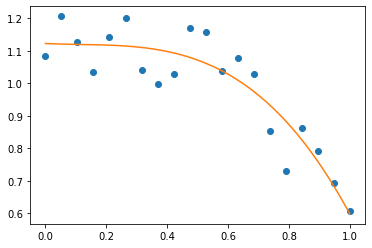

In [113]:
x = np.linspace(0,1,20)
y = np.cos(x) + 0.3*np.random.rand(20)

p = np.poly1d(np.polyfit(x,y,3)) # 多项式拟合
t = np.linspace(0,1,200)
plt.plot(x,y,'o', t, p(t), '-')

In [114]:
p = np.polynomial.Polynomial([-1, 2, 3])
p

Polynomial([-1.,  2.,  3.], domain=[-1,  1], window=[-1,  1])

In [115]:
p(0), p.roots(), p.degree()

(-1.0, array([-1.        ,  0.33333333]), 2)

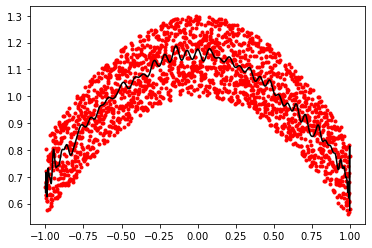

In [116]:
x = np.linspace(-1,1,2000)
y = np.cos(x) + 0.3*np.random.rand(2000)
p = np.polynomial.Chebyshev.fit(x,y, 90) # 拟合

t = np.linspace(-1,1,2000)
plt.plot(x,y,'r.', t, p(t), 'k-')

## 加载数据文件

In [117]:
# 文本文件
data = np.array([[1900, 30000, 4000, 48300],
                [1901, 47200, 6100, 48200],
                [1902, 70200, 9800, 41500]])
file_path = 'data/population.txt'
np.savetxt(file_path, data)
data2 = np.loadtxt(file_path)
data2

array([[ 1900., 30000.,  4000., 48300.],
       [ 1901., 47200.,  6100., 48200.],
       [ 1902., 70200.,  9800., 41500.]])

In [118]:
# 图片
img = plt.imread('data/elephant.jpg')
img.shape, img.dtype

((240, 160, 3), dtype('uint8'))

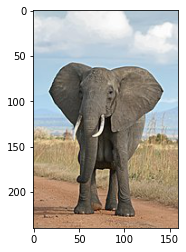

In [119]:
plt.imshow(img)
plt.savefig('data/plot.png')

In [120]:
plt.imsave('data/plot2.png', img[:,:,0], cmap=plt.cm.gray)

In [121]:
# Numpy的格式
data = np.ones((3,3))
data_path = 'data/population.npy'
np.save(data_path, data)
data2 = np.load(data_path)
data2

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])